<h3>Analyze A/B Test Results</h3>
<br>You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page. Either way assure that your code passes the project RUBRIC. Please save regularly.

This project will assure you have mastered the subjects covered in the statistics lessons. The hope is to have this project be as comprehensive of these topics as possible. Good luck!

<h3>Table of Contents</h3>

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>

<h3>Introduction</h3>
A/B tests are very commonly performed by data analysts and data scientists. It is important that you get some practice working with the difficulties of these
For this project, you will be working to understand the results of an A/B test run by an e-commerce website. Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question. The labels for each classroom concept are provided for each question. This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria. As a final check, assure you meet all the criteria on the RUBRIC.


<a id='probability'></a>
<h3>Probability</h3>
To get started, let's import our libraries.



In [53]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [54]:
df=pd.read_csv('ab_data.csv')
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Number of rows in dataset

In [55]:
df.shape[0]

294478

c. No. of unique users in dataset

In [56]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted


In [57]:
df.groupby(df['converted']).size().transform(lambda x:x/x.sum()*100)

converted
0    88.034081
1    11.965919
dtype: float64

e. The number of times the new_page and treatment don't match.

In [58]:
#Summing the count of rows where control and new page are aligned , treatment and old page are aligned
df.query("(group =='treatment' and landing_page =='old_page')").count()[0] + df.query("(group =='control' and landing_page =='new_page')").count()[0]

3893

f. Do any of the rows have missing values?

In [59]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

2. For the rows where treatment does not match with new_page or control does not match with old_page, we cannot be sure if this row truly received the new or old page. Use Quiz 2 in the classroom to figure out how we should handle these rows.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz. Store your new dataframe in df2.

In [60]:
#Filtering rows where control and old page , treatment and new_page are aligned and storing in df2
df2= df.query("(group =='control' and landing_page =='old_page') or (group =='treatment' and landing_page =='new_page')")
df2.shape

(290585, 5)

In [61]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

a. How many unique user_ids are in df2?

In [62]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one user_id repeated in df2. What is it?

In [63]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat user_id?


In [64]:
temp=df2[df2['user_id']==773192]
temp

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.

In [65]:
#check the index of the two non unique rows
temp.index

Int64Index([1899, 2893], dtype='int64')

In [66]:
df2.drop(temp.index[0],inplace=True)

C:\Users\arryg\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [67]:
#Confirming if the row with index 1899 is dropped
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


4. Use df2 in the cells below to answer the quiz questions related to Quiz 4 in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [68]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the control group, what is the probability they converted?

In [69]:
convert_control=df2[df2.group=='control'].groupby(['converted']).size().transform(lambda x:x/x.sum()*100)
convert_control

converted
0    87.96137
1    12.03863
dtype: float64

c. Given that an individual was in the treatment group, what is the probability they converted?


In [70]:
convert_treatment=df2[df2.group=='treatment'].groupby(['converted']).size().transform(lambda x:x/x.sum()*100)
convert_treatment

converted
0    88.119193
1    11.880807
dtype: float64

In [71]:
obs_diff=(convert_treatment[1]/100)-(convert_control[1]/100)
obs_diff

-0.0015782389853555706

d. What is the probability that an individual received the new page?

In [72]:
(df2.landing_page=='new_page').mean()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions

<b>1)From the above results, we see that the difference in proportions between control and treatment groups is very small. Infact we see that the control group(for old page) converted slightly better than the new page.But, this might be due to random chance since we have taken data only for a little while. 
We might consider increasing the time frame for better results.

2)Another thing to be noted is that the probability of converting for new page is 50% which means, there is a 50% chance of the old page converting as well.

Hence, from the above results a definite conclusion regarding new treatment page leading to conversions is not possible.



<a id='ab_test'></a>
<h3>Part II - A/B Test</h3>

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time? How long do you run to render a decision that neither page is better than another?

These questions are the difficult parts associated with A/B tests in general.

1. For now, consider you need to make the decision just based on all the data provided. If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be? You can state your hypothesis in terms of words or in terms of  𝑝𝑜𝑙𝑑  and  𝑝𝑛𝑒𝑤 , which are the converted rates for the old and new pages.

 <li>$H_{0}$: $p_{old}$- $p_{new}$>=0
<li>$H_{A}$: $p_{old}$ - $p_{new}$< 0

2. Assume under the null hypothesis,  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  both have "true" success rates equal to the converted success rate regardless of page - that is  𝑝𝑛𝑒𝑤 and  𝑝𝑜𝑙𝑑  are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page. 


Use a sample size for each page equal to the ones in ab_data.csv. 


Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null. 


Use the cells below to provide the necessary parts of this simulation. If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem. You can use Quiz 5 in the classroom to make sure you are on the right track.


a. What is the conversion rate for $p_{new}$ under the null?


In [73]:
p_new= df2['converted'].mean()
p_new

0.11959708724499628

a. What is the conversion rate for $p_{old}$ under the null?

In [74]:
p_old= df2['converted'].mean()
p_old

0.11959708724499628

c. What is  𝑛𝑛𝑒𝑤 , the number of individuals in the treatment group?

In [75]:
n_new= df2[df2.group=='treatment']['user_id'].count()
n_new

145310

d. What is  𝑛𝑜𝑙𝑑 , the number of individuals in the control group?

In [76]:
n_old=df2[df2.group=='control']['user_id'].count()
n_old

145274

e. Simulate  𝑛𝑛𝑒𝑤  transactions with a conversion rate of  𝑝𝑛𝑒𝑤  under the null. Store these  𝑛𝑛𝑒𝑤  1's and 0's in new_page_converted.

In [77]:
new_page_converted = np. random.choice([1,0],p=[p_new,1-p_new], size=n_new)
new_page_converted.mean()

0.12016378776409056


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null. Store these $n_{old}$ 1's and 0's in old_page_converted.

In [78]:
#Similar to above 
old_page_converted = np.random.choice([1,0],p=[p_old,1-p_old],size=n_old)
old_page_converted.mean()

0.11980120324352603

g. Find  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  for your simulated values from part (e) and (f).

In [79]:
new_page_converted.mean()-old_page_converted.mean()

0.00036258452056453505

h. Create 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called p_diffs.

In [80]:
#p_diffs = []

#for _ in range(10000):
 #   new_page_converted = np. random.choice([1,0],p=[p_new,1-p_new], size=n_new)
 #   old_page_converted = np.random.choice([1,0],p=[p_old,1-p_old],size=n_old)
 #   p_diffs.append(new_page_converted.mean()-old_page_converted.mean())


When possible, it is always more computationally efficient to use numpy built-in operations over explicit for loops. The short reason is that numpy -based operations attack a computational problem based on vectors by computing large chunks simultaneously.
Additionally, using loops to simulate 10000 can take a considerable amount of time vs using numpy https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought

In [94]:
p_diffs =[]

for _ in range(10000):
    new_page_converted = np. random.binomial(n_new,p_new,10000)/n_new
    old_page_converted = np.random.binomial(n_old,p_old,10000)/n_old
    p_diffs=new_page_converted-old_page_converted


In [95]:
#Store p_diffs in an array
p_diffs=np.array(p_diffs)
p_diffs.mean()

1.640172213116085e-05

In [96]:
#Computate mean in null distribution
obs_diff=(convert_treatment[1]/100)-(convert_control[1]/100)
obs_diff

-0.0015782389853555706

i. Plot a histogram of the p_diffs. Does this plot look like what you expected? Use the matching problem in the classroom to assure you fully understand what was computed here.

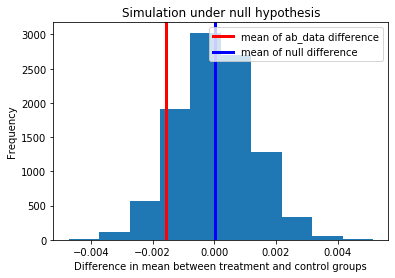

In [97]:
#Difference between treatment and control group(ab_data)
ab_df=obs_diff
#Difference between treatment and control under null hypothesis
null_df= p_diffs.mean()
plt.hist(p_diffs)
plt.title('Simulation under null hypothesis')
plt.xlabel('Difference in mean between treatment and control groups')
plt.ylabel('Frequency')
plt.axvline(x=ab_df,color='red', label =  'mean of ab_data difference',linewidth=3)
plt.axvline(x=null_df,color='blue',label='mean of null difference',linewidth=3)
plt.legend()

The above graph follows a normal distribution according to central limit theorem.

j. What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

In [85]:
(p_diffs-obs_diff).mean()

0.0015783663507481275

In [86]:
(p_diffs>obs_diff).mean()

0.90508144

k. Please explain using the vocabulary you've learned in this course what you just computed in part j. What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages?

<h3>Answer:</h3>

<ul><b>1.The proportion of p_diffs greater than actual difference(obs_diff) observed is known as p value. </ul>
<ul><b>2.A p value is defined as the probability of finding the observed value as extreme as observed if null hypothesis is true.</ul>
<ul><b>3.From the above , we see that the p value is > alpha =0.5, hence concluding that we failed to reject null meaning , the new pages don't really perform better than the old pages.    </ul>
    
   
l. We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let n_old and n_new refer the the number of rows associated with the old page and new pages, respectively.

In [87]:
import statsmodels.api as sm
#Get only converted values in control group
convert_old = df2[df2.group=='control'].groupby(['converted']).size()
convert_old=convert_old[1]
convert_old

17489

In [88]:
#Get only converted values in treatment group
convert_new =df2[df2.group=='treatment'].groupby(['converted']).size()
convert_new=convert_new[1]
convert_new

17264

In [89]:
#Fetching all the values under control
n_old=sum(df2[df2.group=='control'].groupby(['converted']).size())
n_old

145274

In [90]:
#Fetching all the values under treatment
n_new = sum(df2[df2.group=='treatment'].groupby(['converted']).size())
n_new

145310


m. Now use stats.proportions_ztest to compute your test statistic and p-value. [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [91]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? Do they agree with the findings in parts j. and k.?

<h3>Answer:</h3>
In statistics, a <b>z score</b> value tells us how many standard deviations away are we from the mean. 
<br><b>Critical Value</b> is a line on graph that splits the graph into sections. One or two of the sections is the “rejection region”; if your test value falls into that region, then you reject the null hypothesis.

<ul>1.At 95%confidence level, the critical value is 1.96. From the above calculation, we found that the z score  is less than 1.96 implying, we failed to reject null.
 
 <img src="../AB TEsting/Z score.png" />

2.Similarly looking at the  p-value , we find that at alpha=0.05, 0.905>0.05, we conclude that the new page do not convert better than the old page.</ul>



<a id='regression'></a>
<h3>Part III - A regression approach</h3>
1. In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?
<h3>Answer</h3>
<b>We would perform a Logistic Regression since the conversion values are binary.</b>

b. The goal is to use statsmodels to fit the regression model you specified in part a. to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received. Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control.

In [92]:
df2['intercept']=1

C:\Users\arryg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
df2[['control','treatment']]=pd.get_dummies(df['group'])

KeyboardInterrupt: 

In [ ]:
#Rename treatment column as ab column 
df2=df2.rename(columns={'treatment': 'ab_page'})

In [ ]:
df2.head()

In [ ]:
#Since we want to fit a model with treatment as 1 and control as 0, we take dummy column treatment as independent variable
import statsmodels.api as sm

logit_model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=logit_model.fit()
results.summary()

e. What is the p-value associated with ab_page? Why does it differ from the value you found in the Part II?
<br><b>Answer</b><br>
We see a p value of <b>0.190</b> for ab_page

Hint: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the Part II?

<b><br><u>Answer</u></b></br>

<li>$H_{0}$: $p_{new}$= $p_{old}$
<li>$H_{Alt}$: $p_{new}$ $\neq$  $p_{old}$
 

<b>1. The hypothesis stated is a two tailed test as opposed to the one tailed test done before.<br>
   2.As per the results above, the p value associated with ab_page is 0.190 which is greater than 0.05 making the coefficient insignificant.<br>3.Since the p value is insignificant, it essentially means that there is no difference between the old and new page.Therefore, we accept the null hypothesis.<br> 4. The results are similar with the hypothesis test where we failed to reject null and concluded that the new page doesn't convert better than the old page.
    

f. Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?

<u><h4>Answer</h4></u>
<b>It is a good idea to consider taking other variables into consideration as we can see how they influence the dependent variable but we should also take the R square into consideration . We should see that increasing the number of independent variables doesn't reduce the R square value as there might be outliers and other errors possible.
    
<h4> Disadvantage</h4>
1. We might never know if the the factors we have taken into consideration are sufficient enough for influencing the dependent variable. Infact, there might always be other factors which we couldn't accomodate into the model.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the countries.csv dataset and merge together your datasets on the appropriate rows. Here are the docs for joining tables.

Does it appear that country had an impact on conversion? Don't forget to create dummy variables for these country columns - Hint: You will need two columns for the three dummy variables. Provide the statistical output as well as a written response to answer this question.

In [ ]:
#Importing countries dataset
countries=pd.read_csv('countries.csv')
countries.head()

In [ ]:
#Joining countries dataframe with df2 and storing in a new dataframe
df_new = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

In [ ]:
#Checking the different countries present in the dataset and their respective counts
df_new['country'].value_counts()

In [ ]:
#Creating dummy variables
df_new[['US','UK','CA']]=pd.get_dummies(df_new['country'])[['US','UK','CA']]
df_new.head()

In [ ]:
#Fit the model by checking if country has an effect on the dependent variable converted taking CA as base variable
df_new['intercept']=1
logistic_country = sm.Logit(df_new['converted'],df_new[['intercept','US','UK','ab_page']])
result_country = logistic_country.fit()
result_country.summary()


From the above model, we look at the coefficients of US, UK and ab_page. All the variables have a p value > 0.05 making them insignificant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.

In [ ]:
# Creating new columns for interaction between page and country
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

In [ ]:
# Fit the model using interaction columns
lm_new = sm.Logit(df_new['converted'],df_new[['intercept','US','UK','ab_page','US_ab_page','UK_ab_page']])
results_new = lm_new.fit()
results_new.summary()

<b>Result:</b><br>
All the p_values are still > 0.25(2 tailed test), making them insignificant. 
Even after adding a new column called Country, we failed to reject null. They don't influence the conversion of pages.
The old conclusion still remains true i.e the old page performed better than the new page.


<h3>Conclusion</h3>

1. We see that the addition of different columns make the variables insignificant thereby failing to reject null.
2. The old page converted a little better than the new page.
3. Also, as mentioned previously there are chances that it might not be possible to accomodate all the factors influencing the dependent variables considering the fact that the conclusions derived are strictly from the data we have from 3 different countries.Additional factors might influence conversion too but they have not been included in the dataset.



References:
 Medium , github, stattrek.com